In [21]:
import matplotlib.pyplot as plt
import math

In [22]:
hipercube_edmond_karp_data = {}
hipercube_dinic_data = {}
matchings_edmond_karp_data = {}
matchings_dinic_data = {}

with open('gen-cube-ed.txt') as file:
    for line in file.readlines():
        line = line.strip().split()

        hipercube_edmond_karp_data[int(line[0])] = float(line[1]), float(line[2]), float(line[3])

with open('gen-cube-di.txt') as file:
    for line in file.readlines():
        line = line.strip().split()

        hipercube_dinic_data[int(line[0])] = float(line[1]), float(line[2]), float(line[3])

with open('gen-bi-ed.txt') as file:
    for line in file.readlines():
        line = line.strip().split()

        if not int(line[0]) in matchings_edmond_karp_data:
            matchings_edmond_karp_data[int(line[0])] = dict()
        
        matchings_edmond_karp_data[int(line[0])][int(line[1])] = float(line[2]), float(line[3]), float(line[4])

with open('gen-bi-di.txt') as file:
    for line in file.readlines():
        line = line.strip().split()

        if not int(line[0]) in matchings_dinic_data:
            matchings_dinic_data[int(line[0])] = dict()
        
        matchings_dinic_data[int(line[0])][int(line[1])] = float(line[2]), float(line[3]), float(line[4])


In [95]:
def plot_hipercube(dataset, title):
    x = []
    y = [[], [], []]
    for k, data in dataset.items():
        x.append(k)
        y[0].append(data[0])
        y[1].append(data[1])
        y[2].append(data[2])
        #y[2].append(math.log2(data[2]))

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

    ax1.scatter(x, y[0], marker='x', s=20)
    ax1.set_xlabel('k\nhipercube dimension = 2^k')
    ax1.set_title('Maximal Flow')

    ax2.scatter(x, y[1], marker='x', s=20)
    ax2.set_xlabel('k\nhipercube dimension = 2^k')
    ax2.set_title('Augmenting Path Number')

    ax3.scatter(x, y[2], marker='x', s=20)
    ax3.set_xlabel('k\nhipercube dimension = 2^k')
    ax3.set_title('Execution Time [milliseconds]')

    fig.suptitle(title)
    fig.tight_layout()
    plt.show()

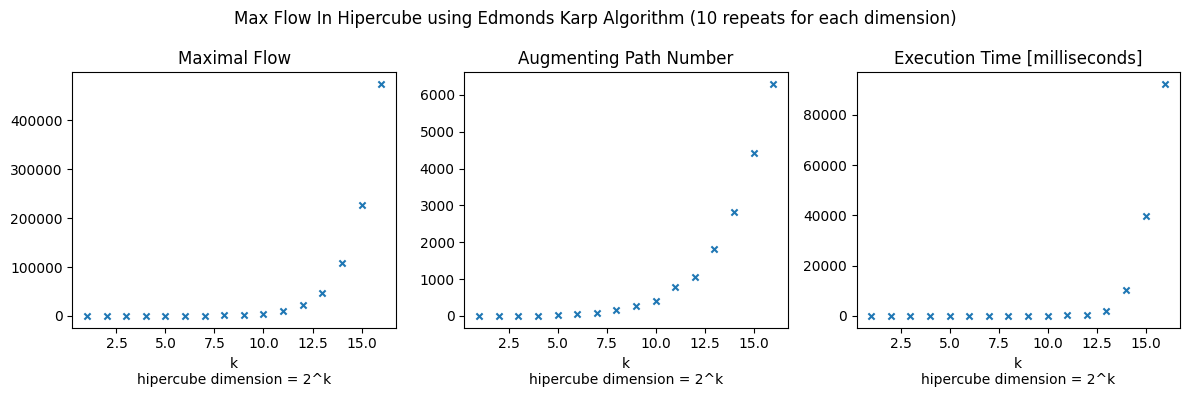

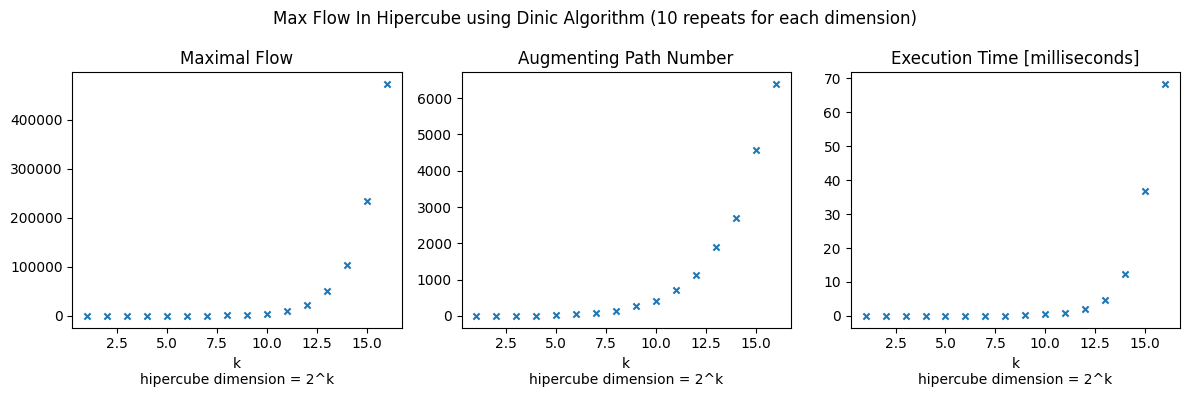

In [96]:
plot_hipercube(hipercube_edmond_karp_data, 'Max Flow In Hipercube using Edmonds Karp Algorithm (10 repeats for each dimension)')
plot_hipercube(hipercube_dinic_data, 'Max Flow In Hipercube using Dinic Algorithm (10 repeats for each dimension)')

In [83]:
def plot_matchings_flow(dataset, title):
    fig, axs = plt.subplots(4, 2, figsize=(12,12))
    for index, (key, data) in enumerate(dataset.items()):
        x = []
        y = []

        for k, d in data.items():
            x.append(k)
            y.append(d[0])

        row = index % 4
        col = index // 4


        axs[row, col].plot(x, y, marker='x')
        axs[row, col].set_xlabel('vertex degree')
        axs[row, col].set_ylabel('maximal matching size')
        axs[row, col].set_title(f'Bipartite Subset Size = {2 ** key}')

        
    fig.suptitle(title)
    fig.tight_layout()
    plt.show()

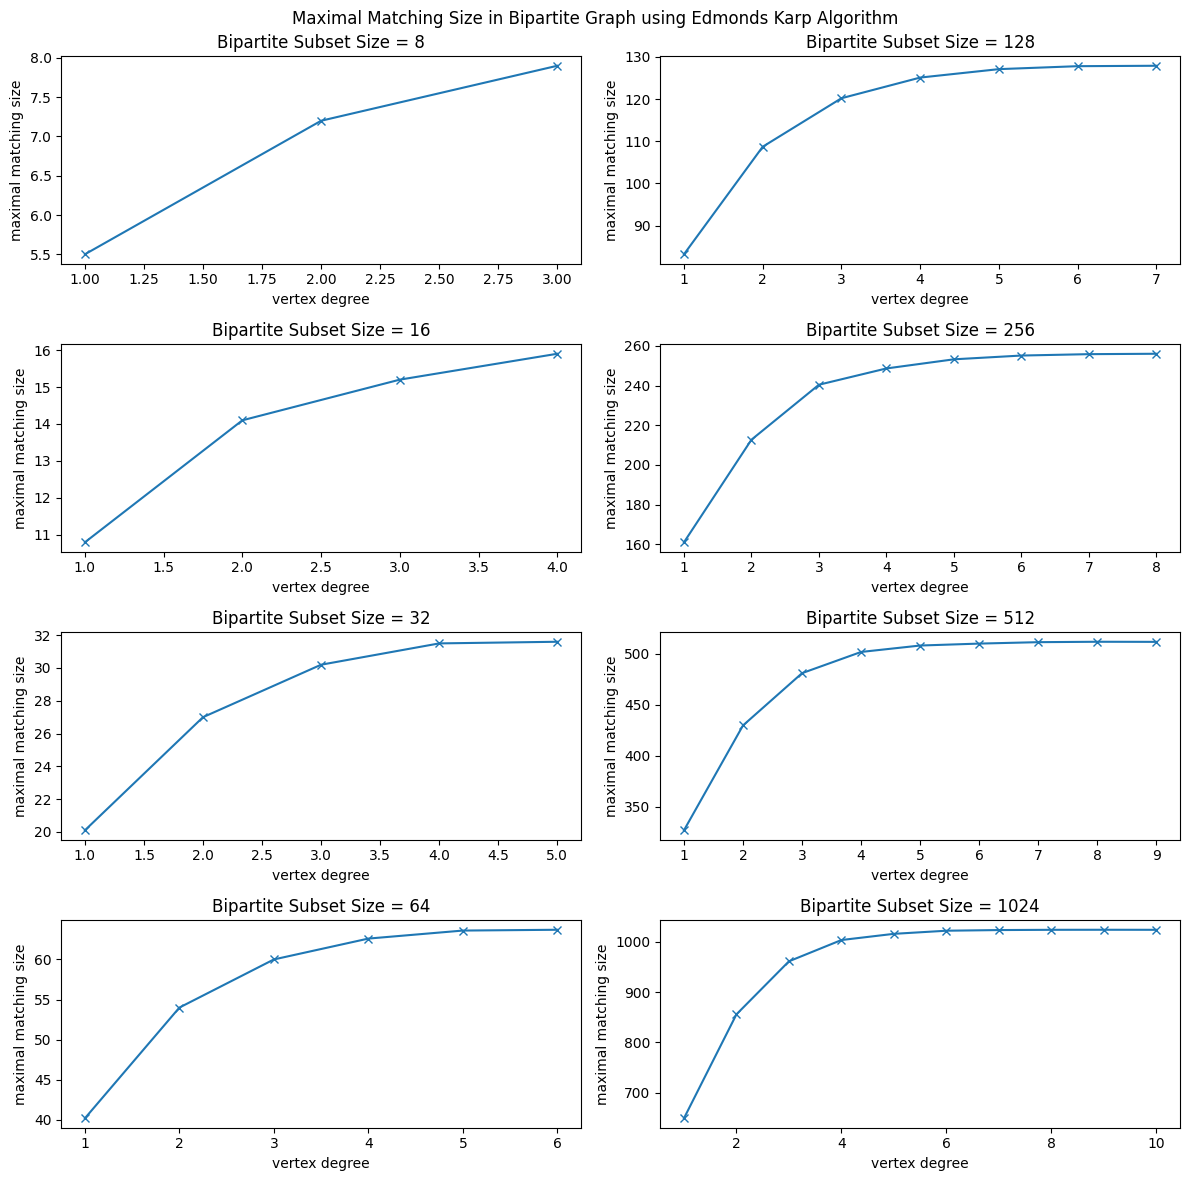

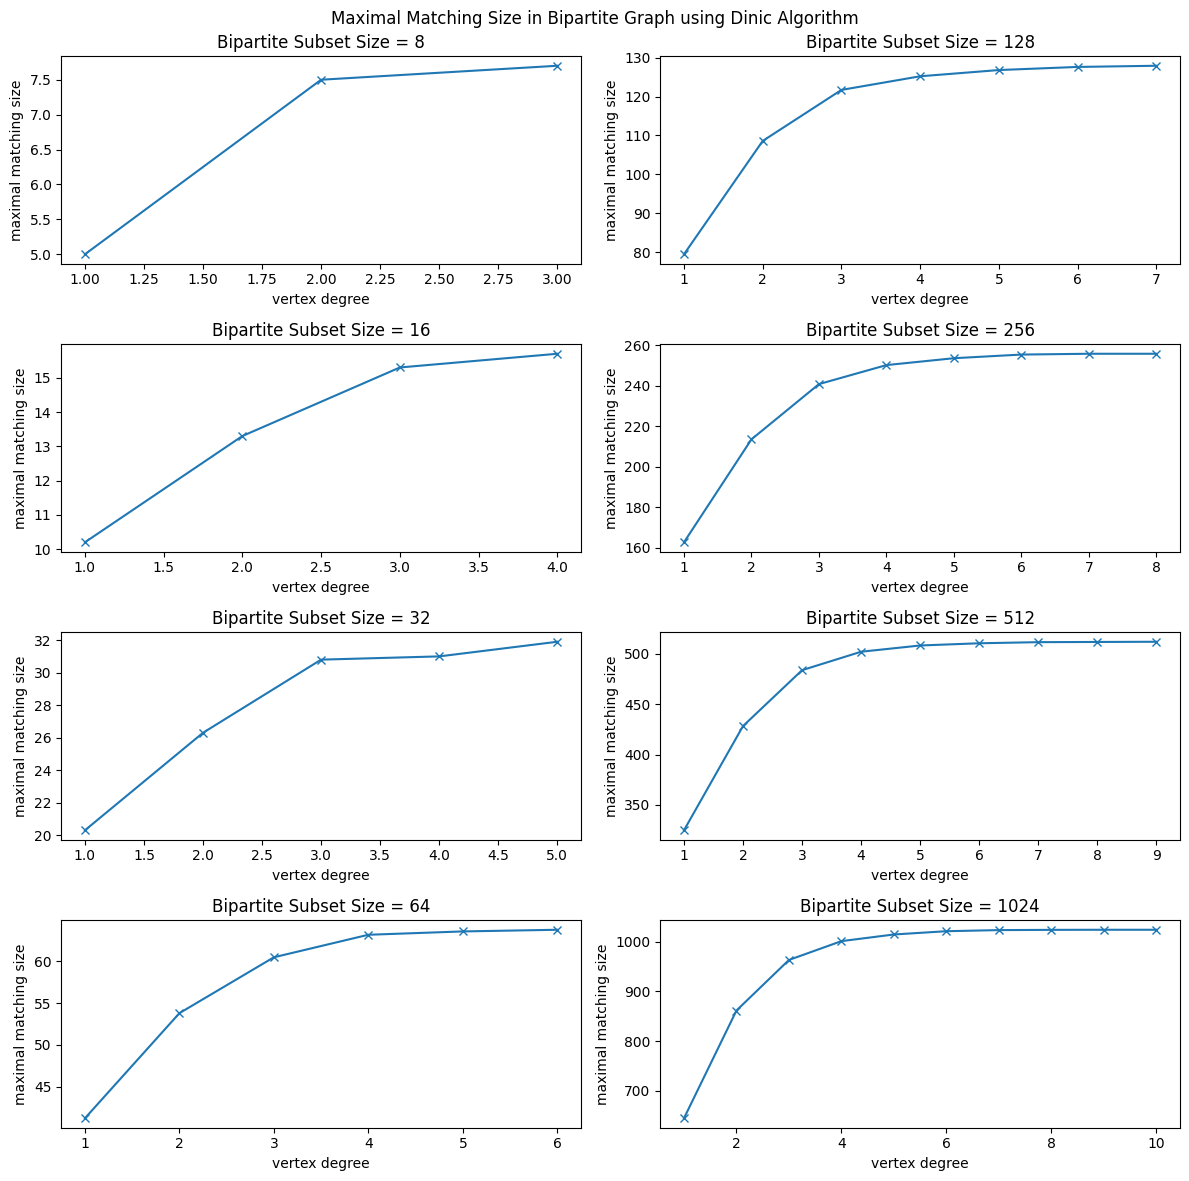

In [84]:
plot_matchings_flow(matchings_edmond_karp_data, "Maximal Matching Size in Bipartite Graph using Edmonds Karp Algorithm")
plot_matchings_flow(matchings_dinic_data, "Maximal Matching Size in Bipartite Graph using Dinic Algorithm")

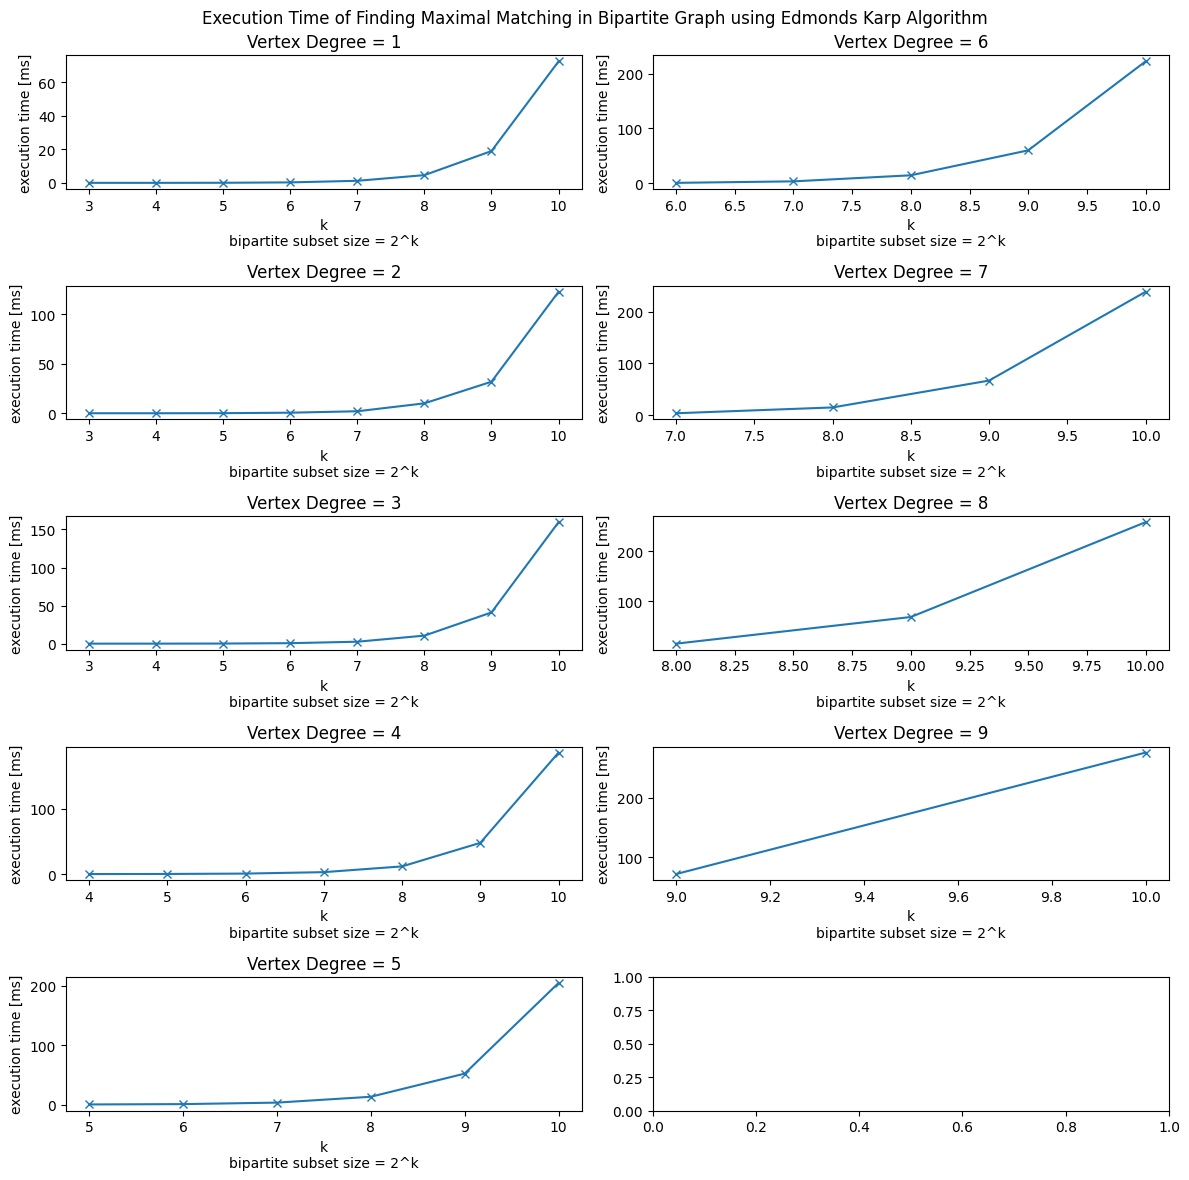

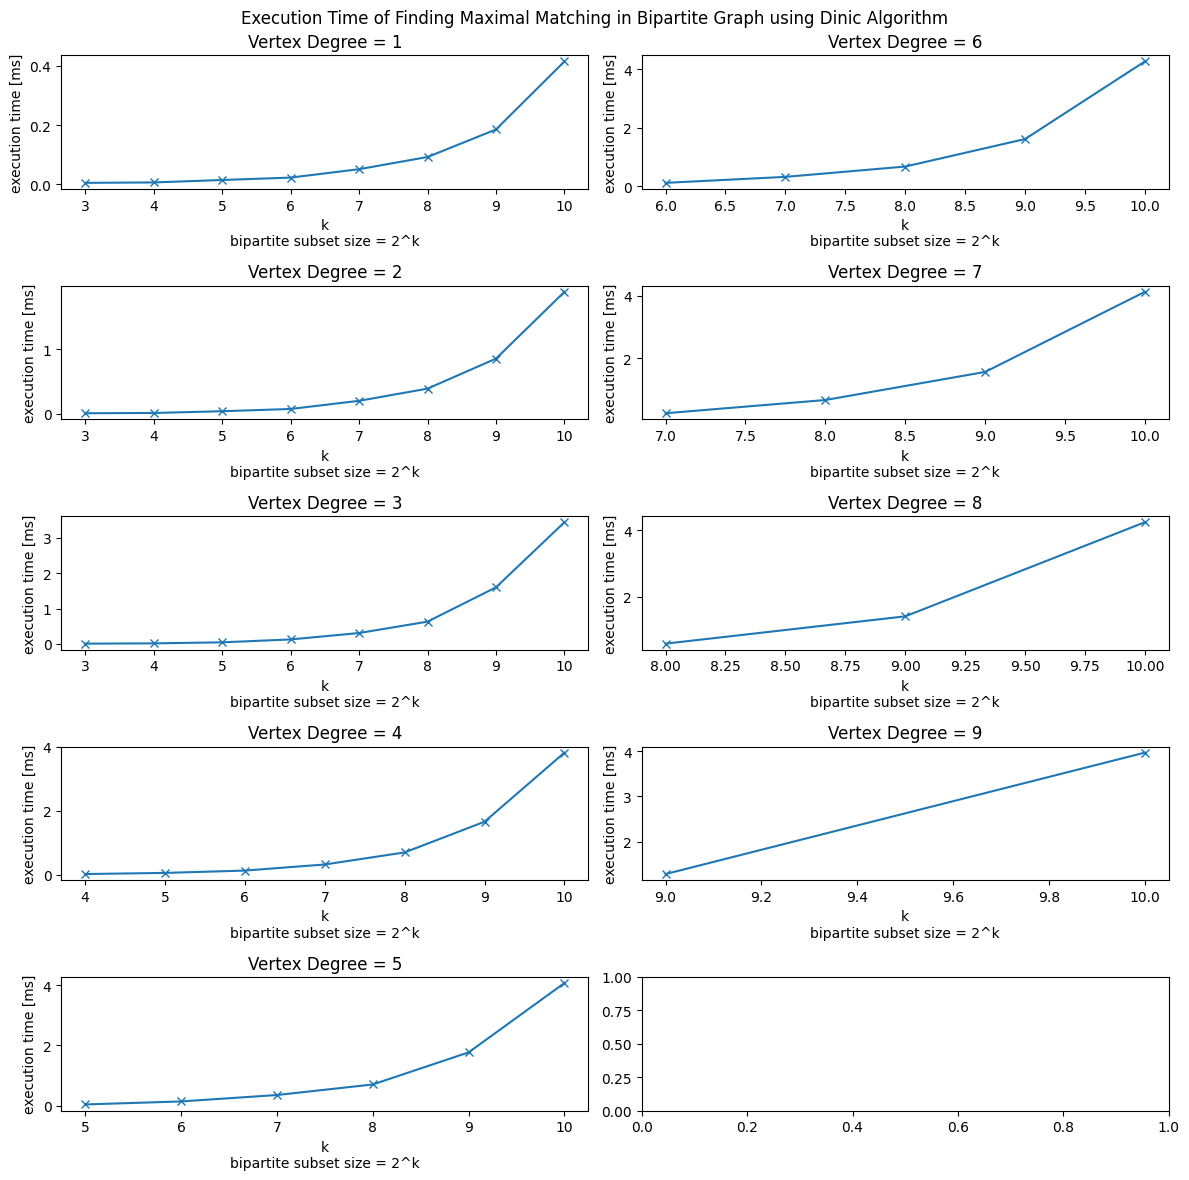

In [81]:
def plot_matchings_time(dataset, title):
    data = {}
    for i in range(1, 11):
        data[i] = []

    for k_key, k_data in dataset.items():
        for i_key, i_data in k_data.items():
            data[i_key].append((k_key, i_data[2]))
        
    fig, axs = plt.subplots(5, 2, figsize=(12,12))
    for k, d in data.items():
        x = []
        y = []

        for val in d:
            x.append(val[0])
            y.append(val[1])

        if(len(x) < 2):
            continue

        row = (k - 1) % 5
        col = (k - 1) // 5


        axs[row, col].plot(x, y, marker='x')
        axs[row, col].set_xlabel('k\nbipartite subset size = 2^k')
        axs[row, col].set_ylabel('execution time [ms]')
        axs[row, col].set_title(f'Vertex Degree = {k}')

        
    fig.suptitle(title)
    fig.tight_layout()
    plt.show()

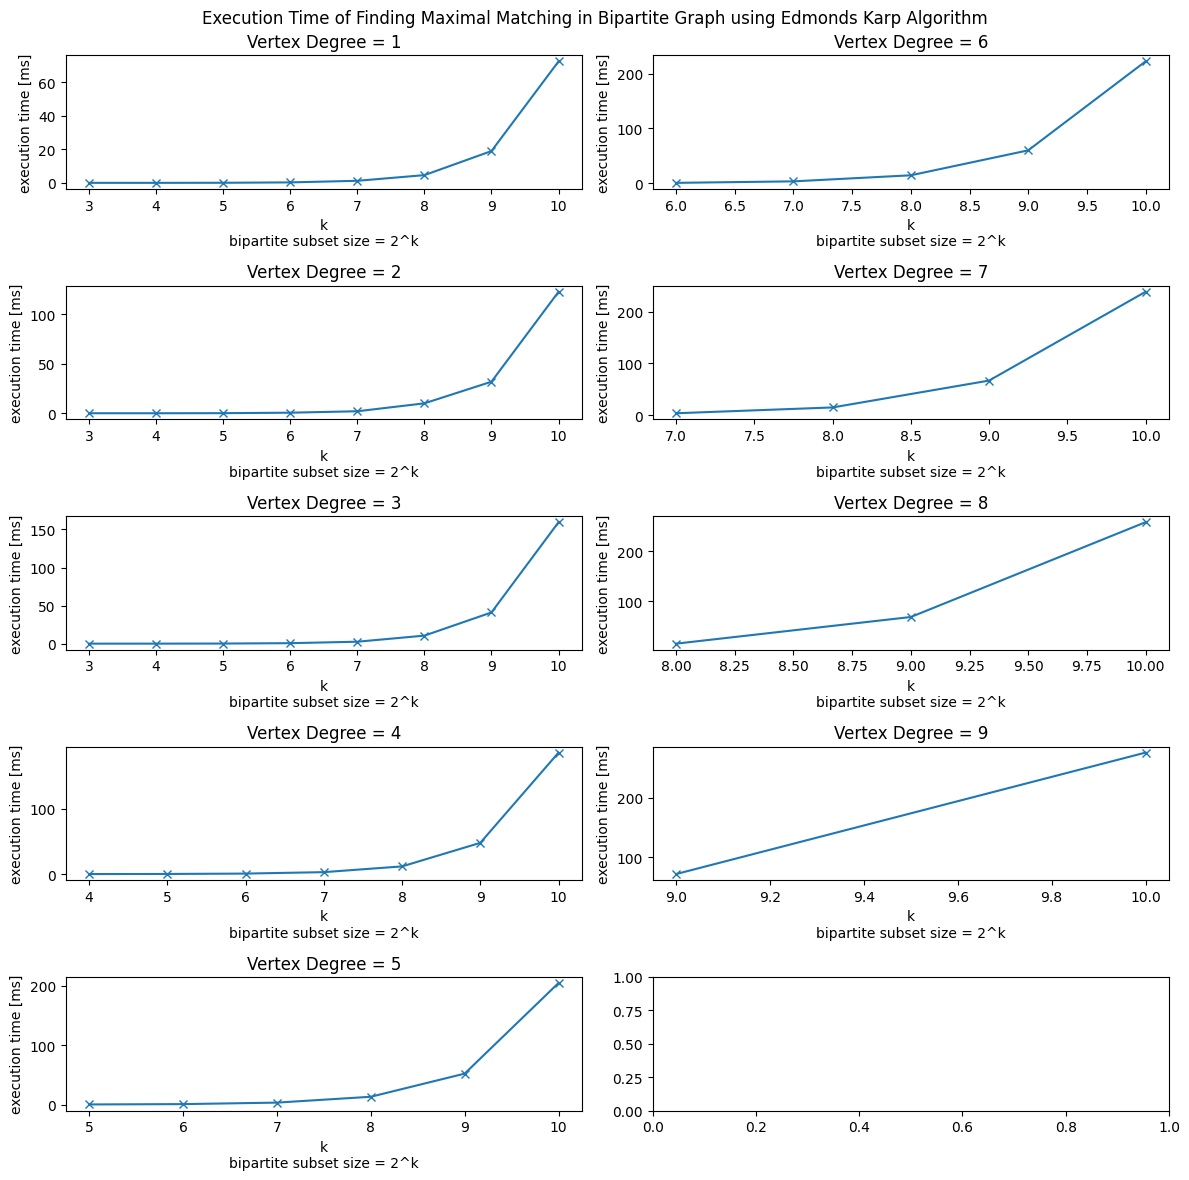

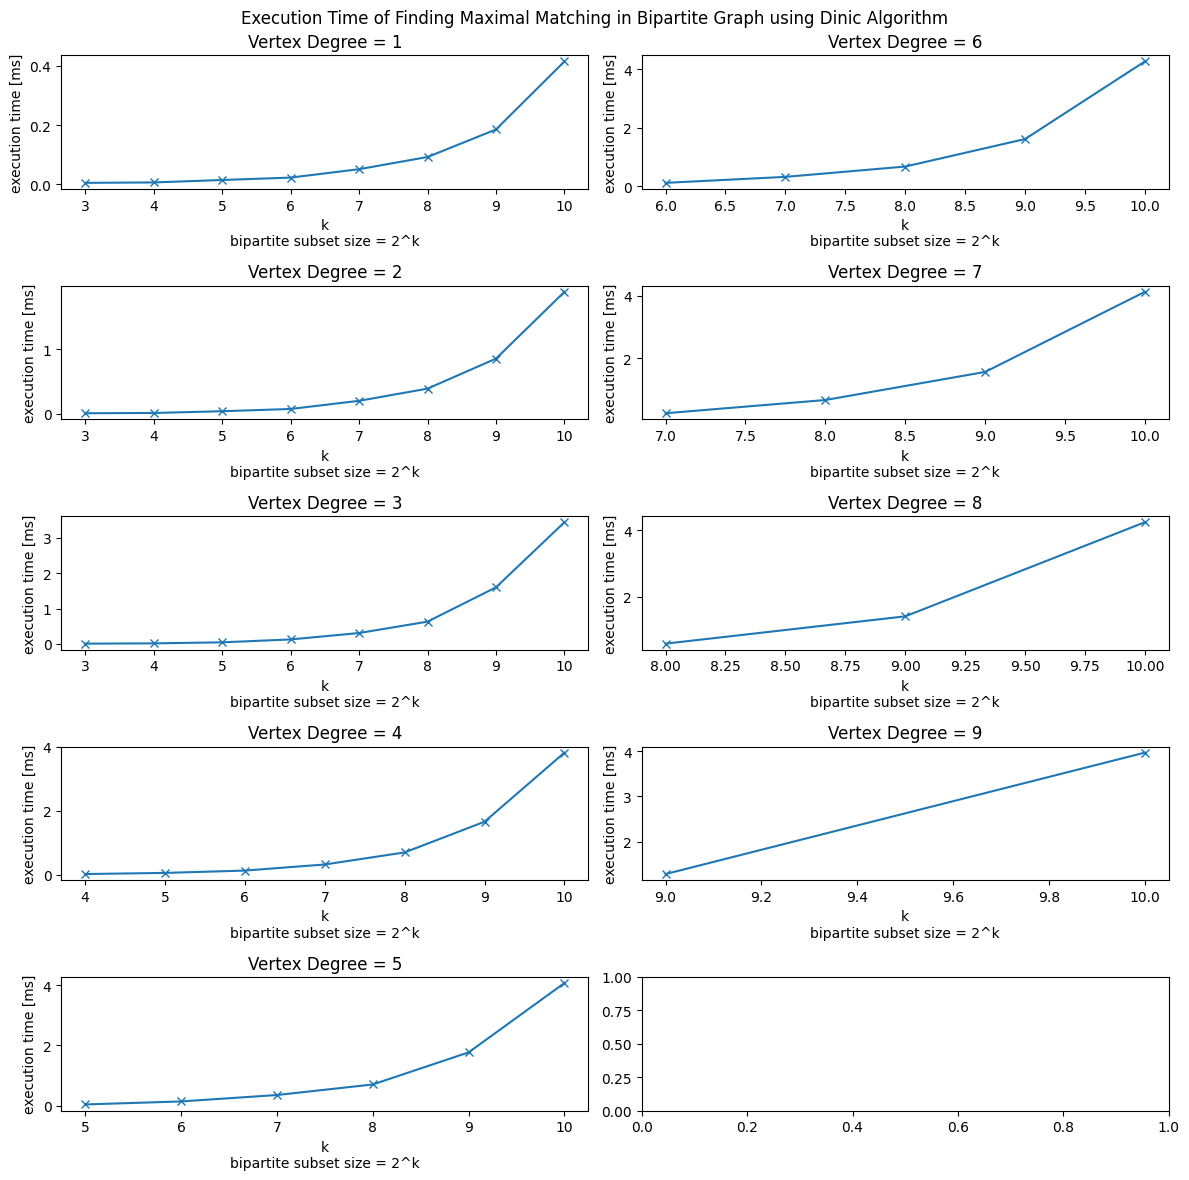

In [82]:
plot_matchings_time(matchings_edmond_karp_data, 'Execution Time of Finding Maximal Matching in Bipartite Graph using Edmonds Karp Algorithm')
plot_matchings_time(matchings_dinic_data, 'Execution Time of Finding Maximal Matching in Bipartite Graph using Dinic Algorithm')